The quality of data and amount of useful information that it contains are key factors that determine how well a ML algorithm can learn.

### Dealing with Missing Data

In [1]:
# imports

import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Creating example data

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [3]:
# Seeing how many null values are in df

df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

### Eliminating Samples or Features with Missing Values

In [4]:
# Deleting entire row with NA

df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
# Delete coulmns with NA

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
# Only drop rows where all columns are NA

df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
# Drop rows that have at least 4 non-NAN values

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
# Only drop rows where NaN appear in specific columns (here: 'C)

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


Con for deleting data:
1. removing too many samples, which will not make a reliable analysis
2. risk of losing valuable information

### Imputing Missing Values

In [9]:
# Implementing Imputer from sklearn

from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

In [10]:
imr

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

### Understanding the Scikit-Learn Estimator API

transformer: classes that transform data
fit: learn the parameters from the training data
transform: uses the parameters to transform data
Supervised Learning: there is a predict method

### Handling Categorical Data

Distinguish between nominal and ordinal features
- ordinal: categorical values that can be sorted or ordered
- nominal: doesn't imply any order

In [11]:
# Creating simple dataframe

df = pd.DataFrame([
        ['green','M','10.1','class1'],
        ['red','L','13.5','class2'],
        ['blue','XL','15.3','class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


#### Mapping Ordinal Features

In [12]:
# Mapping the sizes with numerical values to indicate order in the algorithm

size_mapping = {'XL' : 3,'L' : 2,'M' : 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


To reverse the mapping
inv_size_mapping = {v:k for k,v in size_mapping.items()}

#### Encoding Class Labels

In [13]:
# Creating a code for each class when order does not matter

import numpy as np
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [14]:
# Map out the class labels

df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [15]:
# Reversing the mapping

inv_class_mapping = {v:k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [16]:
# USe Scikit-Learn for LabelEncoding

from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values) # same thing as fitting then transforming
y

array([0, 1, 0])

In [17]:
# Reversing fit_transform

class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

#### Performing One-Hot Encoding on Nominal Features

In [18]:
# Encoding the color column

X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, '10.1'],
       [2, 2, '13.5'],
       [0, 3, '15.3']], dtype=object)

The issue with this is that an algorithm will assume that color '0' has lower value than the others, which is not the case.

One-Hot Encoding creates a dummy feature for each unique valuein the nominal feature column.
In this example, three new features will be created: blue, green, red. Binary values will be used to represent if shirt has that color.

In [19]:
# Using One-Hot Encoder

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0]) # first column
ohe.fit_transform(X).toarray() # returns a sparse matrix

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [20]:
# Creating dummy features

pd.get_dummies(df[['price', 'color', 'size']])

,size,price_10.1,price_13.5,price_15.3,color_blue,color_green,color_red
0,1,1.0,0.0,0.0,0.0,1.0,0.0
1,2,0.0,1.0,0.0,0.0,0.0,1.0
2,3,0.0,0.0,1.0,1.0,0.0,0.0


### Partitioning a Dataset in Training and Test Sets

In [21]:
# Extracting wine data

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
                      , header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 
                   'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                   'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 
                   'Proline']
print 'Class labels', np.unique(df_wine['Class label'])

Class labels [1 2 3]


In [22]:
df_wine.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
# Splitting data into test and training data

from sklearn.cross_validation import train_test_split
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Bringing Features onto the Same Scale

Feature scaling is very important in preprocessing (DT and RF: no scaling necessary).

Two different types of Scaling:
1. Normalization
    - rescaling from [0,1]
    - min-max scaling
2. Standardization
    - center feature columns at mean 0 with standard deviation 1
    - maintains outliers and makes it less sensitive compared to min-max scaling

In [24]:
# Using Min-Max Scaling (Normalization)

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [25]:
# Implementing Standardization

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Selecting Meaningful Features

If model performs much better on training dataset than the test dataset, then it is overfitting.
Common solutions to reduce generalization error:
1. Collect more training data
2. Introduce a penalty for complexity via regularization
3. Choose a simpler model with fewer parameters
4. Reduce the dimensionality of the data

#### Sparse Solutions with L1 Regularization

- L2 regularization: penalizing large individual weights
    - minimize the sum of the unoenalized cost function plus the penalty term
- L1 regularization: yields sparse feature vectors; most feature weights will be zero

In [26]:
# Implementing L1 regularization

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

('Training accuracy:', 0.9838709677419355)
('Test accuracy:', 0.98148148148148151)


Since both training and test accuracy is around 98%, it indicates that there is no overfitting.

In [27]:
# Retrieving the intercept terms

lr.intercept_

array([-0.38376012, -0.15807558, -0.70041438])

Applying LR on a multiclass dataset, it uses OvR (One-vs-Rest) approach:
- class 1 vs class 2,3
- class 2 vs class 1,3
- class 3 vs class 1,2

In [28]:
# Retrieving the coefficient terms

lr.coef_

array([[ 0.27992918,  0.        ,  0.        , -0.02777919,  0.        ,
         0.        ,  0.70995768,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23665108],
       [-0.6440008 , -0.06876942, -0.05721433,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92671304,
         0.06017542,  0.        , -0.37105315],
       [ 0.        ,  0.06144151,  0.        ,  0.        ,  0.        ,
         0.        , -0.63610068,  0.        ,  0.        ,  0.49814279,
        -0.35830847, -0.57109454,  0.        ]])

There are three rows, one weight vector for each class.
There are 13 weights in each row, one for each feature.
Each weight is multiplied respectively by its feature.

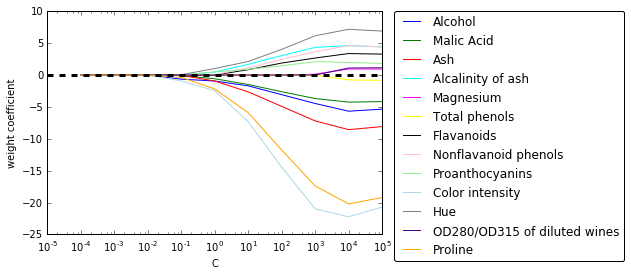

In [29]:
# Plotting the regularization paths

fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue','green','red','cyan',
         'magenta','yellow','black',
         'pink','lightgreen','lightblue',
         'gray','indigo','orange']
weights, params = [], []
for c in np.arange(-4,6):
    lr = LogisticRegression(penalty='l1',
                           C=10**(int(c)),
                           random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**(int(c)))
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]),colors):
    plt.plot(params, weights[:,column],
            label=df_wine.columns[column+1],
            color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
         bbox_to_anchor=(1.38,1.03),
         ncol=1, fancybox=True)
plt.show()

#### Sequential Feature Selection Algorithms

Dimensionality Reduction:
- reduce complexity of model
- avoid overfitting
- Two main categories:
    - Feature Selection:
        - select a subset of original features
    - Feature Extraction
        - derive information from feature set to construct a new feature subspace

Sequential Feature Selection Algorithms:
- greedy search algorithms
    - automatically selects a subset of features that are most relevant to problem
    - improves computational efficiency
    - reduces generalization error
    - great for algorithms that do not support regularization
- exhaustive search algorithms
    - searches through all possible combinations of features to get the optimal solution
    - does NOT make locally optimal choices at each stage of combinational search (greedy)

Sequential Backward Selection (SBS):
- reduces dimensionality of initial feature subspace with a minimum decay in performance of classifier to improve upon computational efficiency
- removes features from full set until new feature subspace contains the desired number of features
- to calculate the features that has the least performance:
    1. initialize algorithm with k=d
        - d is dimension of full set
    2. Determine feature x- that maximizes the criterion x- = arg maxJ(X-x)
    3. Remove feature x- from the feature set
    4. Terminate if k equals number of desired features, if not, go to Step 2.

In [35]:
# Creating SBS class from scratch

from sklearn.base import clone
from itertools import combinations
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, \
                random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
        train_test_split(X,y,test_size=self.test_size, random_state=self.random_state)
        
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
            
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

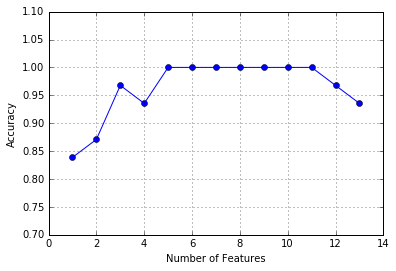

In [38]:
# Implementing the SBS class

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.grid()
plt.show()

Based on the plot above, 100% accuracy can be achieved if features 5-10 are used. Accuracy decreases when others are used.

In [39]:
# Finding out what features are 5-11

k5 = list(sbs.subsets_[8])
print df_wine.columns[1:][k5]

Index([u'Alcohol', u'Malic Acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')


In [40]:
# Implementing KNN on originial data

knn.fit(X_train_std, y_train)
print 'Training accuracy:', knn.score(X_train_std, y_train)
print 'Test Accuracy:', knn.score(X_test_std, y_test)

Training accuracy: 0.983870967742
Test Accuracy: 0.944444444444


In [41]:
# Implementing KNN after feature selection

knn.fit(X_train_std[:,k5], y_train)
print 'Training accuracy:', knn.score(X_train_std[:,k5], y_train)
print 'Test accuracy:', knn.score(X_test_std[:,k5], y_test)

Training accuracy: 0.959677419355
Test accuracy: 0.962962962963


#### Assessing Feature Importance with Random Forest

Measure feature importance as the averaged impurity decrease computed from all decision trees in the forest without making any assumptions whether our data is linearly separable or not.

In [42]:
# Implementing Random Forest to obtain important features

from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print "%2d %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]) 

 1 Color intensity                0.182483
 2 Proline                        0.158610
 3 Flavanoids                     0.150948
 4 OD280/OD315 of diluted wines   0.131987
 5 Alcohol                        0.106589
 6 Hue                            0.078243
 7 Total phenols                  0.060718
 8 Alcalinity of ash              0.032033
 9 Malic Acid                     0.025400
10 Proanthocyanins                0.022351
11 Magnesium                      0.022078
12 Nonflavanoid phenols           0.014645
13 Ash                            0.013916


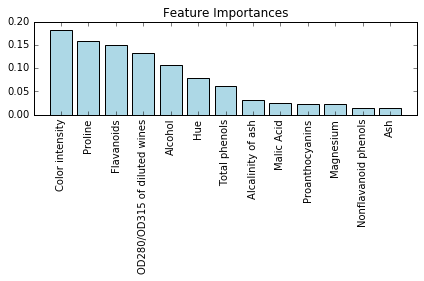

In [43]:
# Plotting the feature importances

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [45]:
# Use transform method to select the important features of the RF using a specified threshold

X_selected = forest.transform(X_train, threshold=0.15)
X_selected.shape

/Users/tqrahman/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(124, 3)